<a href="https://colab.research.google.com/github/tushargarg18/Computational_Intelligence/blob/main/lab_5_stud_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy logic

Install following prerequisities:

In [ ]:
# Example
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.8 MB/s eta 0:00:00


# Example 1

Create fuzzy sets for input variable temperature


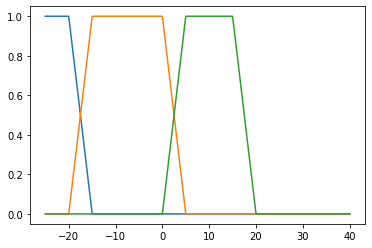

In [ ]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-22, -15, 0, 5])
warm = fuzz.trapmf(temp_x, [0, 5, 15, 20])


plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)



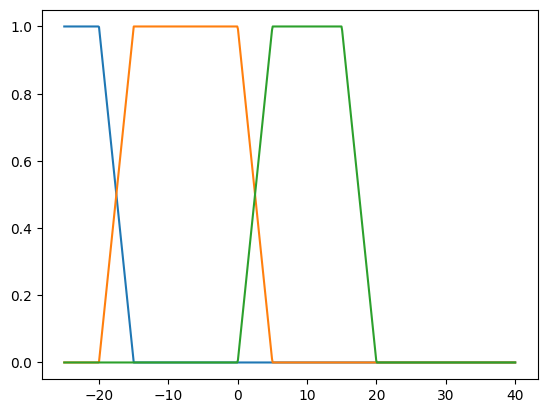

In [ ]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-20, -15, 0, 5])
warm = fuzz.trapmf(temp_x, [0, 5, 15, 20])


plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold)
plt.plot(temp_x, warm)



## Task 1

Create fuzzy set for cold, warm and hot and plot all memebership functions to a single graph.

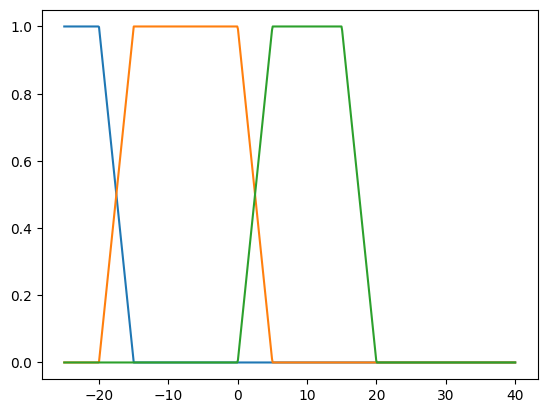

In [ ]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_out = np.linspace(-25,40,650)

cold = fuzz.trapmf(temp_out, [-25, -25, -20, -15])
warm = fuzz.trapmf(temp_out, [-20, -15, 0, 5])
hot = fuzz.trapmf(temp_out, [0, 5, 15, 20])


plt.plot(temp_out, cold)
plt.plot(temp_out, warm)
plt.plot(temp_out, hot)

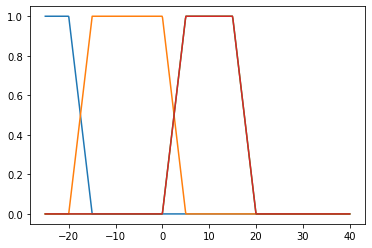

In [ ]:
Write your code here

## Task 2

Create fuzzy sets low, medium, high for heating.

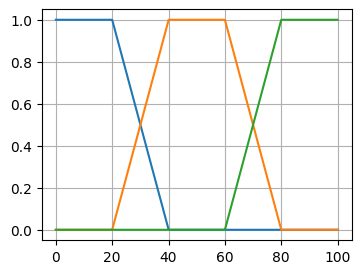

In [ ]:
heating_temp = np.linspace(0, 100, 1000)

# trapezoid membership funtion
low = fuzz.trapmf(heating_temp, [0, 0, 20, 40])
medium = fuzz.trapmf(heating_temp, [20, 40, 60, 80])
high = fuzz.trapmf(heating_temp, [60, 80, 100, 100])

plt.figure(figsize=(4,3))
plt.plot(heating_temp, low)
plt.plot(heating_temp, medium)
plt.plot(heating_temp, high)
plt.grid()
plt.show()


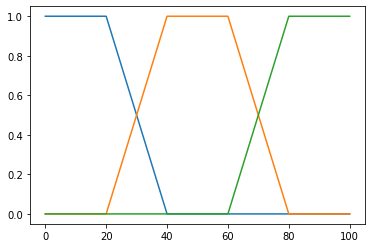

In [ ]:
Write your code here

## Task 3

Create fuzzy sets closed, partially, half, nearly, open.

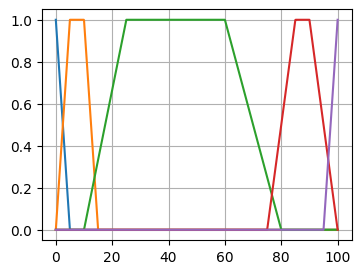

In [ ]:
window = np.linspace(0, 100, 1000)

# trapezoid membership funtion
closed = fuzz.trapmf(window, [0, 0, 0, 5])
partially = fuzz.trapmf(window, [0, 5, 10, 15])
half = fuzz.trapmf(window, [10, 25, 60, 80])
nearly = fuzz.trapmf(window, [75, 85, 90, 100])
open = fuzz.trapmf(window, [95, 100, 100, 100])

plt.figure(figsize=(4,3))
plt.plot(window, closed)
plt.plot(window, partially)
plt.plot(window, half)
plt.plot(window, nearly)
plt.plot(window, open)
plt.grid()
plt.show()

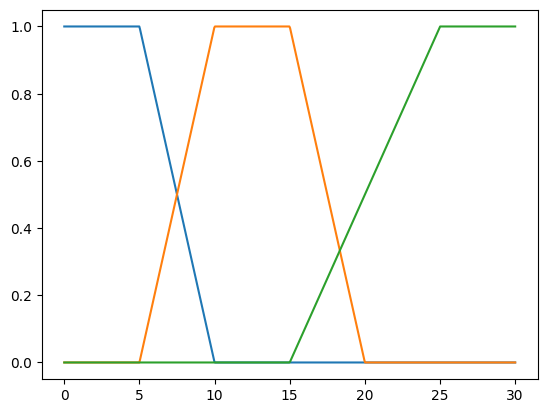

In [ ]:
temp_in = np.linspace(0,30,650)

cold = fuzz.trapmf(temp_in, [0, 0, 5, 10])
warm = fuzz.trapmf(temp_in, [5, 10, 15, 20])
hot = fuzz.trapmf(temp_in, [15, 25, 30, 30])


plt.plot(temp_in, cold)
plt.plot(temp_in, warm)
plt.plot(temp_in, hot)

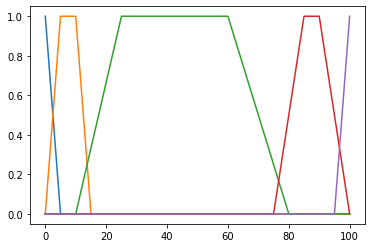

In [ ]:
Write your code here

## Task 4

According to this tutorial create fuzzy system.
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html


Create rules for our fuzzy variable window, temperature, heating and observe the fuzzy output.

In [ ]:
# temprature inside

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temp_out = ctrl.Antecedent(np.arange(-25, 40, 0.1), 'temp_out')
window = ctrl.Antecedent(np.arange(0, 100, 0.1), 'window')
temp_in = ctrl.Antecedent(np.arange(0, 25, 0.025), 'temp_in')
heating = ctrl.Consequent(np.arange(0, 100, 0.1), 'heating')

heating['low'] = low
heating['medium'] = medium
heating['high'] = high

temp_out['very_cold'] = very_cold
temp_out['cold'] = cold
temp_out['warm'] = warm

window['closed'] = closed
window['partially'] = partially
window['half'] = half
window['open'] = open
window['nearly'] = nearly

temp_in['low'] = low
temp_in['medium'] = medium
temp_in['high'] = high

In [ ]:
rule1 = ctrl.Rule(temp_out['very_cold'] | temp_in['low'] | window['open'], heating['high'])
rule2 = ctrl.Rule(temp_out['very_cold'] | (temp_in['medium'] & (window['open'] | window['half'])), heating['high'])
rule3 = ctrl.Rule(temp_out['cold'], heating['medium'])
rule4 = ctrl.Rule(temp_in['medium'] & window['open'], heating['high'])
rule5 = ctrl.Rule(temp_in['high'] & (window['closed'] | window['nearly'] | window['partially']), heating['low'])
rule6 = ctrl.Rule(temp_out['warm'], heating['low'])

In [ ]:
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

In [ ]:
heating_temp = ctrl.ControlSystemSimulation(heating_ctrl)

15.540043019300231


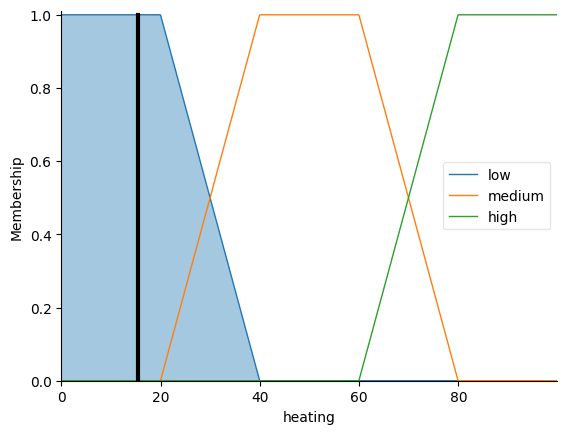

In [ ]:
heating_temp.input['temp_out'] = 30
heating_temp.input['temp_in'] = 30
heating_temp.input['window'] = 0

# Crunch the numbers
heating_temp.compute()

print(heating_temp.output['heating'])
heating.view(sim=heating_temp)l